# Analysis with Pandas

**Pandas’** syntax is quite different from SQL. In Pandas, you apply operations on the dataset, and chain them, in order to transform and reshape the data the way you want it.


In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Sep 02 23:55:34 2020

@author: PrakharJ

"""

import pandasql as ps
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

airports = pd.read_csv('data/airports.csv')
airport_freq = pd.read_csv('data/airport-frequencies.csv')
runways = pd.read_csv('data/runways.csv')

**SELECT, WHERE, DISTINCT, LIMIT**


Here are same SELECT statements converted to pandas. We sample results with head, and filter them with values. We use unique to remove duplicated results.


In [142]:
airports.dtypes
airports.describe()
airports.sample(10)
airports.info()
airports.shape
airports.columns.to_list()

In [155]:
airports.dtypes

id                     int64
ident                 object
type                  object
name                  object
latitude_deg         float64
longitude_deg        float64
elevation_ft         float64
continent             object
iso_country           object
iso_region            object
municipality          object
scheduled_service     object
gps_code              object
iata_code             object
local_code            object
home_link             object
wikipedia_link        object
keywords              object
dtype: object

In [65]:
airports.head(3)

id ident           type                  name  latitude_deg  \
0    6523   00A       heliport     Total Rf Heliport     40.070801   
1  323361  00AA  small_airport  Aero B Ranch Airport     38.704022   
2    6524  00AK  small_airport          Lowell Field     59.949200   

   longitude_deg  elevation_ft continent iso_country iso_region  municipality  \
0     -74.933601          11.0       NaN          US      US-PA      Bensalem   
1    -101.473911        3435.0       NaN          US      US-KS         Leoti   
2    -151.695999         450.0       NaN          US      US-AK  Anchor Point   

  scheduled_service gps_code iata_code local_code home_link wikipedia_link  \
0                no      00A       NaN        00A       NaN            NaN   
1                no     00AA       NaN       00AA       NaN            NaN   
2                no     00AK       NaN       00AK       NaN            NaN   

  keywords  
0      NaN  
1      NaN  
2      NaN

In [3]:
airports[["iso_country", "iso_region", "elevation_ft", "type"]].sample(10)

iso_country iso_region  elevation_ft           type
34796          MX     MX-HID        7600.0  small_airport
30559          KR      KR-31           NaN       heliport
21857          FR     FR-ARA        5912.0       heliport
42691          BR      BR-MG        3700.0         closed
3144           US      US-IA        1049.0       heliport
8773           US      US-NJ          29.0       heliport
25063          US      US-IL         980.0  small_airport
4009           US      US-CO        5681.0       heliport
50890          RU      RU-KR          82.0       heliport
24692          ID      ID-PA        6885.0  small_airport

In [157]:
airports[airports.ident == 'KLAX']

id ident           type                               name  \
29183  3632  KLAX  large_airport  Los Angeles International Airport   

       latitude_deg  longitude_deg  elevation_ft continent iso_country  \
29183     33.942501    -118.407997         125.0       NaN          US   

      iso_region municipality scheduled_service gps_code iata_code local_code  \
29183      US-CA  Los Angeles               yes     KLAX       LAX        LAX   

                     home_link  \
29183  https://www.flylax.com/   

                                          wikipedia_link keywords  
29183  https://en.wikipedia.org/wiki/Los_Angeles_Inte...      NaN

In [160]:
airports.iso_country.unique()

array(['US', 'PR', 'MH', 'MP', 'GU', 'SO', 'AQ', 'GB', 'PG', 'AD', 'SD',
       'SA', 'AE', 'SS', 'ES', 'CN', 'AF', 'LK', 'SB', 'CO', 'AU', 'MG',
       'TD', 'AL', 'XK', 'AM', 'MX', 'MZ', 'PW', 'NR', 'AO', 'AR', 'AS',
       'AT', 'GA', 'AZ', 'BA', 'BE', 'DE', 'BF', 'BG', 'GL', 'BH', 'BI',
       'IS', 'BJ', 'OM', 'BM', 'KE', 'PH', 'BO', 'BR', 'BS', 'CV', 'BW',
       'FJ', 'BY', 'UA', 'LR', 'BZ', 'CA', 'CD', 'CF', 'CG', 'MR', 'CH',
       'CL', 'CM', 'CR', 'CU', 'CY', 'CZ', 'SK', 'PA', 'DZ', 'ID', 'GH',
       'RU', 'CI', 'DK', 'NG', 'DO', 'NE', 'HR', 'TN', 'TG', 'EC', 'EE',
       'FI', 'EG', 'GG', 'JE', 'IM', 'FK', 'EH', 'NL', 'IE', 'FO', 'LU',
       'GT', 'NO', 'PL', 'ER', 'MN', 'PT', 'SE', 'ET', 'LV', 'LT', 'ZA',
       'SZ', 'GQ', 'SH', 'MU', 'IO', 'ZM', 'FM', 'KM', 'YT', 'RE', 'TF',
       'ST', 'FR', 'SC', 'ZW', 'MW', 'LS', nan, 'ML', 'GM', 'GE', 'GF',
       'SL', 'GW', 'MA', 'GN', 'SN', 'GR', 'TZ', 'GY', 'SR', 'DJ', 'HK',
       'LY', 'HN', 'VN', 'KZ', 'RW', 'HT', 'HU', 'UG

**SELECT with multiple conditions**

We join multiple conditions with an &. If we only want a subset of columns from the table, that subset is applied in another pair of square brackets.

In [161]:
airports[(airports.iso_region == 'US-CA') & (airports.type == 'seaplane_base')]

id ident           type                                      name  \
984      7436   0O0  seaplane_base          San Luis Reservoir Seaplane Base   
2505     8877  22CA  seaplane_base            Commodore Center Seaplane Base   
6278    12298  5CA9  seaplane_base       Konocti  - Clear Lake Seaplane Base   
13633   16514   C39  seaplane_base                 Folsom Lake Seaplane Base   
15976   16830  CN20  seaplane_base             Ferndale Resort Seaplane Base   
18367   17157   E20  seaplane_base              Lake Berryessa Seaplane Base   
23896   17613   H77  seaplane_base           Bridge Bay Resort Seaplane Base   
31921   21444   L11  seaplane_base                Pebbly Beach Seaplane Base   
38734   23479   O06  seaplane_base  Lake Oroville Landing Area Seaplane Base   
42451   24384   S74  seaplane_base                   Lost Isle Seaplane Base   
49982  300312   TWH  seaplane_base           Two Harbors Amphibious Terminal   

       latitude_deg  longitude_deg  elevation_ft continent iso_country  \
984       37.058300    -121.125999         544.0       NaN          US   
2505      37.879902    -122.514000           NaN       NaN          US   
6278      38.977699    -122.718002        1326.0       NaN          US   
13633     38.707199    -121.133003         466.0       NaN          US   
15976     39.002998    -122.796997        1326.0       NaN          US   
18367     38.591599    -122.259003         440.0       NaN          US   
23896     40.757599    -122.322998        1065.0       NaN          US   
31921     33.338402    -118.311996           NaN       NaN          US   
38734     39.566601    -121.468002         900.0       NaN          US   
42451     38.004101    -121.457001           NaN       NaN          US   
49982     33.432222    -118.508611           NaN       NaN          US   

      iso_region municipality scheduled_service gps_code iata_code local_code  \
984        US-CA    Los Banos                no      0O0       NaN        0O0   
2505       US-CA    Sausalito                no     22CA       NaN       22CA   
6278       US-CA  Kelseyville                no     5CA9       NaN       5CA9   
13633      US-CA       Folsom                no      C39       NaN        C39   
15976      US-CA  Kelseyville                no     CN20       NaN       CN20   
18367      US-CA         Napa                no      E20       NaN        E20   
23896      US-CA      Redding                no      H77       NaN        H77   
31921      US-CA       Avalon                no     KL11       NaN        L11   
38734      US-CA     Oroville                no      O06       NaN        O06   
42451      US-CA     Stockton                no      S74       NaN        S74   
49982      US-CA  Two Harbors                no      NaN       TWH        NaN   

      home_link wikipedia_link keywords  
984         NaN            NaN      NaN  
2505        NaN            NaN      NaN  
6278        NaN            NaN      NaN  
13633       NaN            NaN      NaN  
15976       NaN            NaN      NaN  
18367       NaN            NaN      NaN  
23896       NaN            NaN      NaN  
31921       NaN            NaN      NaN  
38734       NaN            NaN      NaN  
42451       NaN            NaN      NaN  
49982       NaN            NaN      NaN

In [162]:
airports[(airports.iso_region == 'US-CA') & (airports.type == 'large_airport')][['ident', 'name', 'municipality']]

ident                                             name   municipality
27555  KBAB                             Beale Air Force Base     Marysville
28392  KEDW                           Edwards Air Force Base        Edwards
29183  KLAX                Los Angeles International Airport    Los Angeles
29710  KOAK       Metropolitan Oakland International Airport        Oakland
29766  KONT                    Ontario International Airport        Ontario
31287  KSAN                  San Diego International Airport      San Diego
31327  KSFO              San Francisco International Airport  San Francisco
31348  KSJC  Norman Y. Mineta San Jose International Airport       San Jose
31370  KSMF                 Sacramento International Airport     Sacramento
31376  KSNA         John Wayne Airport-Orange County Airport      Santa Ana
31425  KSUU                            Travis Air Force Base      Fairfield
31659  KVBG                        Vandenberg Air Force Base         Lompoc

***ORDER BY***

By default, Pandas will sort things in ascending order. To reverse that, provide ascending=False.

In [163]:
airport_freq[airport_freq.airport_ident == 'KLAX'].sort_values('type')

id  airport_ref airport_ident  type description  frequency_mhz
11952  60767         3632          KLAX   APP   SOCAL APP          36.07
11953  60766         3632          KLAX   APP   SOCAL APP         124.30
11954  60768         3632          KLAX  ATIS        ATIS         133.80
11955  60769         3632          KLAX   CLD    CLNC DEL         121.40
11956  60770         3632          KLAX   DEP   SOCAL DEP         124.30
11957  60771         3632          KLAX   GND         GND         121.65
11958  60772         3632          KLAX  MISC          CG          34.50
11959  60773         3632          KLAX  MISC          CG         898.40
11960  60774         3632          KLAX   OPS          AF          37.22
11961  60775         3632          KLAX   TWR         TWR         119.80
11962  60776         3632          KLAX  UNIC      UNICOM         122.95

In [164]:
airport_freq[airport_freq.airport_ident == 'KLAX'].sort_values('type', ascending=False)

id  airport_ref airport_ident  type description  frequency_mhz
11962  60776         3632          KLAX  UNIC      UNICOM         122.95
11961  60775         3632          KLAX   TWR         TWR         119.80
11960  60774         3632          KLAX   OPS          AF          37.22
11958  60772         3632          KLAX  MISC          CG          34.50
11959  60773         3632          KLAX  MISC          CG         898.40
11957  60771         3632          KLAX   GND         GND         121.65
11956  60770         3632          KLAX   DEP   SOCAL DEP         124.30
11955  60769         3632          KLAX   CLD    CLNC DEL         121.40
11954  60768         3632          KLAX  ATIS        ATIS         133.80
11952  60767         3632          KLAX   APP   SOCAL APP          36.07
11953  60766         3632          KLAX   APP   SOCAL APP         124.30

**IN… NOT IN**


We know how to filter on a value, but what about a list of values — IN condition? In pandas, .isin() operator works the same way. To negate any condition, use ~.

In [165]:
airports[airports.type.isin(['heliport', 'balloonport'])]

id    ident      type                             name  \
0        6523      00A  heliport                Total Rf Heliport   
9      322658     00CN  heliport  Kitchen Creek Helibase Heliport   
12       6532     00FD  heliport               Ringhaver Heliport   
15       6535     00GE  heliport                 Caffrey Heliport   
16       6536     00HI  heliport               Kaupulehu Heliport   
...       ...      ...       ...                              ...   
57028  312611  ZA-0117  heliport                    Pumba Helipad   
57030  312624  ZA-0119  heliport               Cape Town Heliport   
57051  318475  ZA-0140  heliport        Kuruman Hospital Heliport   
57148  301278      ZIZ  heliport                 Zamzama Heliport   
57413   46378  ZZ-0001  heliport                  Sealand Helipad   

       latitude_deg  longitude_deg  elevation_ft continent iso_country  \
0         40.070801     -74.933601          11.0       NaN          US   
9         32.727374    -116.459742        3350.0       NaN          US   
12        28.846600     -82.345398          25.0       NaN          US   
15        33.884201     -84.733902         957.0       NaN          US   
16        19.832715    -155.980233          43.0       NaN          US   
...             ...            ...           ...       ...         ...   
57028    -33.387799      26.410595           NaN        AF          ZA   
57030    -33.901018      18.425936           NaN        AF          ZA   
57051    -27.459904      23.443762           NaN        AF          ZA   
57148     26.710944      67.667250         128.0        AS          PK   
57413     51.894444       1.482500          40.0        EU          GB   

      iso_region        municipality scheduled_service gps_code iata_code  \
0          US-PA            Bensalem                no      00A       NaN   
9          US-CA         Pine Valley                no     00CN       NaN   
12         US-FL           Riverview                no     00FD       NaN   
15         US-GA               Hiram                no     00GE       NaN   
16         US-HI         Kailua-Kona                no     00HI       NaN   
...          ...                 ...               ...      ...       ...   
57028      ZA-EC  Nelson Mandela Bay                no      NaN       NaN   
57030      ZA-WC                 NaN                no      NaN       NaN   
57051      ZA-NC             Kuruman                no      NaN       NaN   
57148      PK-SD   Zamzama Gas Field                no      NaN       ZIZ   
57413     GB-ENG             Sealand                no      NaN       NaN   

      local_code                                    home_link  \
0            00A                                          NaN   
9           00CN                                          NaN   
12          00FD                                          NaN   
15          00GE                                          NaN   
16          00HI                                          NaN   
...          ...                                          ...   
57028        NaN  http://www.pumbagamereserve.co.za/amenities   
57030        NaN                                          NaN   
57051        NaN                                          NaN   
57148        NaN                                          NaN   
57413        NaN                   http://www.sealandgov.org/   

                                          wikipedia_link              keywords  
0                                                    NaN                   NaN  
9                                                    NaN                   NaN  
12                                                   NaN                   NaN  
15                                                   NaN                   NaN  
16                                                   NaN                   NaN  
...                                                  ...                   ...  
57028               

In [166]:
airports[~airports.type.isin(['heliport', 'balloonport'])]

id    ident            type                                name  \
1      323361     00AA   small_airport                Aero B Ranch Airport   
2        6524     00AK   small_airport                        Lowell Field   
3        6525     00AL   small_airport                        Epps Airpark   
4        6526     00AR          closed  Newport Hospital & Clinic Heliport   
5      322127     00AS   small_airport                      Fulton Airport   
...       ...      ...             ...                                 ...   
57410   27244     ZYYJ  medium_airport         Yanji Chaoyangchuan Airport   
57411  317861     ZYYK  medium_airport               Yingkou Lanqi Airport   
57412   32753     ZYYY  medium_airport             Shenyang Dongta Airport   
57414  307326  ZZ-0002   small_airport           Glorioso Islands Airstrip   
57415  313629     ZZZZ   small_airport              Satsuma Iōjima Airport   

       latitude_deg  longitude_deg  elevation_ft continent iso_country  \
1         38.704022    -101.473911        3435.0       NaN          US   
2         59.949200    -151.695999         450.0       NaN          US   
3         34.864799     -86.770302         820.0       NaN          US   
4         35.608700     -91.254898         237.0       NaN          US   
5         34.942803     -97.818019        1100.0       NaN          US   
...             ...            ...           ...       ...         ...   
57410     42.882801     129.451004         624.0        AS          CN   
57411     40.542524     122.358600           0.0        AS          CN   
57412     41.784401     123.496002           NaN        AS          CN   
57414    -11.584278      47.296389          11.0        AF          TF   
57415     30.784722     130.270556         338.0        AS          JP   

      iso_region      municipality scheduled_service gps_code iata_code  \
1          US-KS             Leoti                no     00AA       NaN   
2          US-AK      Anchor Point                no     00AK       NaN   
3          US-AL           Harvest                no     00AL       NaN   
4          US-AR           Newport                no      NaN       NaN   
5          US-OK              Alex                no     00AS       NaN   
...          ...               ...               ...      ...       ...   
57410      CN-22             Yanji               yes     ZYYJ       YNJ   
57411      CN-21           Yingkou               yes     ZYYK       YKH   
57412      CN-21          Shenyang                no     ZYYY       NaN   
57414     TF-U-A  Grande Glorieuse                no      NaN       NaN   
57415      JP-46      Mishima-Mura                no     RJX7       NaN   

      local_code home_link                                     wikipedia_link  \
1           00AA       NaN                                                NaN   
2           00AK       NaN                                                NaN   
3           00AL       NaN                                                NaN   
4            NaN       NaN                                                NaN   
5           00AS       NaN                                                NaN   
...          ...       ...                                                ...   
57410        NaN       NaN  https://en.wikipedia.org/wiki/Yanji_Chaoyangch...   
57411        NaN       NaN  https://en.wikipedia.org/wiki/Yingkou_Lanqi_Ai...   
57412        NaN       NaN                                                NaN   
57414        NaN       NaN                                                NaN   
57415       RJX7       NaN  http://wikimapia.org/6705190/Satsuma-Iwo-jima-...   

                   keywords  
1                       NaN  
2                       NaN  
3                       NaN  
4                      00AR  
5                       NaN  
...                     ...  
57410                   NaN  
57411                   NaN  
57412                   NaN  
57414      

**GROUP BY, COUNT, ORDER BY**


Grouping is straightforward: use the .groupby() operator. There’s a subtle difference between semantics of a COUNT in SQL and Pandas. In Pandas, .count() will return the number of non-null/NaN values. To get the same result as the SQL COUNT, use .size().

In [168]:
airports.groupby(['iso_country', 'type']).size()

iso_country  type          
AD           heliport            2
AE           closed              1
             heliport           21
             large_airport       4
             medium_airport      7
                              ... 
ZM           small_airport      94
ZW           closed              2
             large_airport       1
             medium_airport      8
             small_airport     128
Length: 850, dtype: int64

In [169]:
airports.groupby(['iso_country', 'type']).size().to_frame('size').reset_index().sort_values(['iso_country', 'size'], ascending=[True, False])

iso_country            type  size
0            AD        heliport     2
2            AE        heliport    21
6            AE   small_airport    16
4            AE  medium_airport     7
3            AE   large_airport     4
..          ...             ...   ...
843          ZM   large_airport     1
849          ZW   small_airport   128
848          ZW  medium_airport     8
846          ZW          closed     2
847          ZW   large_airport     1

[850 rows x 3 columns]

Above, we group on more than one field. Pandas will sort things on the same list of fields by default, so there’s no need for a .sort_values() in the first example. If we want to use different fields for sorting, or DESC instead of ASC, like in the second example, we have to be explicit:

What is this trickery with .to_frame() and .reset_index()? Because we want to sort by our calculated field (size), this field needs to become part of the DataFrame. After grouping in Pandas, we get back a different type, called a GroupByObject. So we need to convert it back to a DataFrame. With .reset_index(), we restart row numbering for our data frame.

**HAVING**


In SQL, you can additionally filter grouped data using a HAVING condition. In Pandas, you can use .filter() and provide a Python function (or a lambda) that will return True if the group should be included into the result.


In [170]:
airports[airports.iso_country == 'US'].groupby('type').filter(lambda g: len(g) > 1000).groupby('type').size().sort_values(ascending=False)

type
small_airport    13560
heliport          6315
closed            1932
dtype: int64

**Top N records**


Let’s say we did some preliminary querying, and now have a dataframe called by_country, that contains the number of airports per country:

<img src="head_image.PNG">

In the next example, we order things by airport_count and only select the top 10 countries with the largest count. Second example is the more complicated case, in which we want “the next 10 after the top 10”:

In [173]:
by_country = airports.groupby(["iso_country"]).agg(
    airport_count=pd.NamedAgg(column="iso_region", aggfunc="count")
)

top_10 = by_country.nlargest(10, columns='airport_count').reset_index()
# top_10
# by_country.head(3)

In [175]:
by_country.nlargest(20, columns='airport_count').tail(10)

airport_count
iso_country               
AR                     861
CO                     706
IT                     690
PG                     595
VE                     592
ZA                     490
JP                     481
CL                     480
ID                     478
ES                     446

In [174]:
top_10

iso_country  airport_count
0          US          23256
1          BR           5038
2          CA           2794
3          AU           2018
4          MX           1405
5          KR           1374
6          GB           1203
7          RU           1121
8          DE            957
9          FR            893

## Asking and Answering Questions


**Question 1.Which country has highest percetage of airports in the world ?**

In [176]:
region_wise_pct = airports.groupby('iso_country')[['iso_region']].count().sort_values('iso_region',ascending=False)*100/len(airports)
region_wise_pct


iso_region
iso_country            
US            40.504389
BR             8.774558
CA             4.866239
AU             3.514700
MX             2.447053
...                 ...
GI             0.001742
BL             0.001742
CX             0.001742
CW             0.001742
VA             0.001742

[242 rows x 1 columns]

In [ ]:
Question 2 :Which country have airports , situated above sealevel of an average hight more than 1000 feet ?consider countries those have atleast 500 fleets.

In [177]:
countries_df = airports.groupby('iso_country')[['elevation_ft']].mean().sort_values('elevation_ft', ascending=False)
high_response_countries_df = countries_df.loc[airports.iso_country.value_counts() > 500].head(15)
high_response_countries_df

elevation_ft
iso_country              
MX            2876.396437
PG            1955.884034
BR            1429.460223
FR            1240.598802
CO            1203.201229
CA            1161.450022
US            1155.394316
DE             894.991637
AR             835.834541
VE             680.833616
AU             603.388293
KR             554.873016
IT             545.983240
RU             538.324786
GB             235.765060

In [ ]:
Qustion 3.what is the average elavation of the airport in each type of categeory?

In [128]:
pd.pivot_table(airports,index=['type'],values=['elevation_ft'],aggfunc=np.mean).sort_values('elevation_ft',ascending=False)

elevation_ft
type                        
small_airport    1349.728393
heliport         1199.178122
balloonport      1089.000000
medium_airport   1059.199724
closed           1012.923171
large_airport     798.062295
seaplane_base     649.716329

In [ ]:
Question 4: which US airportS have max elevation in large_airport category ?

In [178]:
airports.query('type == "large_airport" & iso_country == "US"')[['name','iso_country','type','elevation_ft']].head(10).sort_values('elevation_ft',ascending=False)

name iso_country  \
27396                 Albuquerque International Sunport          US   
27465       Rick Husband Amarillo International Airport          US   
27531                        Asheville Regional Airport          US   
27518  Hartsfield Jackson Atlanta International Airport          US   
27428                       Fort Worth Alliance Airport          US   
27527            Austin Bergstrom International Airport          US   
27415                                Joint Base Andrews          US   
27556                          Barksdale Air Force Base          US   
27432                    Augusta Regional At Bush Field          US   
27555                              Beale Air Force Base          US   

                type  elevation_ft  
27396  large_airport        5355.0  
27465  large_airport        3607.0  
27531  large_airport        2165.0  
27518  large_airport        1026.0  
27428  large_airport         722.0  
27527  large_airport         542.0  
27415  large_airport         280.0  
27556  large_airport         166.0  
27432  large_airport         144.0  
27555  large_airport         113.0

***Aggregate functions (MIN, MAX, MEAN)***


Now, given this dataframe or runway data:

<img src="runway_image.PNG">

In [179]:
runways.agg({'length_ft': ['min', 'max', 'mean', 'median']})

length_ft
min          0.000000
max     120000.000000
mean      3262.049433
median    2743.000000

SQL does not have median function. Let’s pretend you wrote a user-defined function to calculate this statistic (since the important part here is syntactic differences between SQL and Pandas).
You will notice that with this SQL query, every statistic is a column. But with this Pandas aggregation, every statistic is a row:

<img src="median_image.PNG">

In [ ]:
Nothing to worry about —simply transpose the dataframe with .T to get columns:

<img src="transpose_image.PNG">

***JOIN***


Use .merge() to join Pandas dataframes.You need to provide which columns to join on (left_on and right_on), and join type: inner (default), left (corresponds to LEFT OUTER in SQL), right (RIGHT OUTER), or outer (FULL OUTER).

In [180]:
airport_freq.merge(airports[airports.ident == 'KLAX'][['id']], left_on='airport_ref', right_on='id', how='inner')[['airport_ident', 'type', 'description', 'frequency_mhz']]

airport_ident  type description  frequency_mhz
0           KLAX   APP   SOCAL APP          36.07
1           KLAX   APP   SOCAL APP         124.30
2           KLAX  ATIS        ATIS         133.80
3           KLAX   CLD    CLNC DEL         121.40
4           KLAX   DEP   SOCAL DEP         124.30
5           KLAX   GND         GND         121.65
6           KLAX  MISC          CG          34.50
7           KLAX  MISC          CG         898.40
8           KLAX   OPS          AF          37.22
9           KLAX   TWR         TWR         119.80
10          KLAX  UNIC      UNICOM         122.95

**UNION ALL and UNION**


Use pd.concat() to UNION ALL two dataframes:

In [181]:
pd.concat([airports[airports.ident == 'KLAX'][['name', 'municipality']], airports[airports.ident == 'KLGB'][['name', 'municipality']]])

name municipality
29183     Los Angeles International Airport  Los Angeles
29208  Long Beach /Daugherty Field/ Airport   Long Beach

To deduplicate things (equivalent of UNION), you’d also have to add .drop_duplicates().

**INSERT**

So far, we’ve been selecting things, but you may need to modify things as well, in the process of your exploratory analysis. What if you wanted to add some missing records?
There’s no such thing as an INSERT in Pandas. Instead, you would create a new dataframe containing new records, and then concat the two:


In [10]:
df1 = pd.DataFrame({'id': [1, 2], 'name': ['Harry Potter', 'Ron Weasley']})

In [11]:
df2 = pd.DataFrame({'id': [3], 'name': ['Hermione Granger']})

In [ ]:
pd.concat([df1, df2]).reset_index(drop=True)

**UPDATE**


Now we need to fix some bad data in the original dataframe:

In [182]:
airports.loc[airports['ident'] == 'KLAX', 'home_link'] = 'http://www.lawa.org/welcomelax.aspx'

**DELETE**


The easiest (and the most readable) way to “delete” things from a Pandas dataframe is to subset the dataframe to rows you want to keep. Alternatively, you can get the indices of rows to delete, and .drop() rows using those indices:

In [ ]:
lax_freq = lax_freq[lax_freq.type != 'MISC']

In [185]:
airports_filter = airports[airports.ident != 'KLAX']
airports_filter

id    ident            type                                name  \
0        6523      00A        heliport                   Total Rf Heliport   
1      323361     00AA   small_airport                Aero B Ranch Airport   
2        6524     00AK   small_airport                        Lowell Field   
3        6525     00AL   small_airport                        Epps Airpark   
4        6526     00AR          closed  Newport Hospital & Clinic Heliport   
...       ...      ...             ...                                 ...   
57411  317861     ZYYK  medium_airport               Yingkou Lanqi Airport   
57412   32753     ZYYY  medium_airport             Shenyang Dongta Airport   
57413   46378  ZZ-0001        heliport                     Sealand Helipad   
57414  307326  ZZ-0002   small_airport           Glorioso Islands Airstrip   
57415  313629     ZZZZ   small_airport              Satsuma Iōjima Airport   

       latitude_deg  longitude_deg  elevation_ft continent iso_country  \
0         40.070801     -74.933601          11.0       NaN          US   
1         38.704022    -101.473911        3435.0       NaN          US   
2         59.949200    -151.695999         450.0       NaN          US   
3         34.864799     -86.770302         820.0       NaN          US   
4         35.608700     -91.254898         237.0       NaN          US   
...             ...            ...           ...       ...         ...   
57411     40.542524     122.358600           0.0        AS          CN   
57412     41.784401     123.496002           NaN        AS          CN   
57413     51.894444       1.482500          40.0        EU          GB   
57414    -11.584278      47.296389          11.0        AF          TF   
57415     30.784722     130.270556         338.0        AS          JP   

      iso_region      municipality scheduled_service gps_code iata_code  \
0          US-PA          Bensalem                no      00A       NaN   
1          US-KS             Leoti                no     00AA       NaN   
2          US-AK      Anchor Point                no     00AK       NaN   
3          US-AL           Harvest                no     00AL       NaN   
4          US-AR           Newport                no      NaN       NaN   
...          ...               ...               ...      ...       ...   
57411      CN-21           Yingkou               yes     ZYYK       YKH   
57412      CN-21          Shenyang                no     ZYYY       NaN   
57413     GB-ENG           Sealand                no      NaN       NaN   
57414     TF-U-A  Grande Glorieuse                no      NaN       NaN   
57415      JP-46      Mishima-Mura                no     RJX7       NaN   

      local_code                   home_link  \
0            00A                         NaN   
1           00AA                         NaN   
2           00AK                         NaN   
3           00AL                         NaN   
4            NaN                         NaN   
...          ...                         ...   
57411        NaN                         NaN   
57412        NaN                         NaN   
57413        NaN  http://www.sealandgov.org/   
57414        NaN                         NaN   
57415       RJX7                         NaN   

                                          wikipedia_link              keywords  
0                                                    NaN                   NaN  
1                                                    NaN                   NaN  
2                                                    NaN                   NaN  
3                                                    NaN                   NaN  
4                                                    NaN                  00AR  
...                                                  ...                   ...  
57411  https://en.wikipedia.org/wiki/Yingkou_Lanqi_Ai...                   NaN  
57412                                                NaN   

In [ ]:
lax_freq.drop(lax_freq[lax_freq.type == 'MISC'].index)

**Immutability**


I need to mention one important thing — immutability. By default, most operators applied to a Pandas dataframe return a new object. Some operators accept a parameter inplace=True, so you can work with the original dataframe instead. For example, here is how you would reset an index in-place:


In [ ]:
df.reset_index(drop=True, inplace=True)

However, the .loc operator in the UPDATE example above simply locates indices of records to updates, and the values are changed in-place. Also, if you updated all values in a column:

In [ ]:
df['url'] = 'http://google.com'

or added a new calculated column:

In [ ]:
df['total_cost'] = df['price'] * df['quantity']

these things would happen in-place.


# And more!


The nice thing about Pandas is that it’s more than just a query engine. You can do other things with your data, such as:


**Export to a multitude of formats:**

In [ ]:
df.to_csv(...)  # csv file
df.to_hdf(...)  # HDF5 file
df.to_pickle(...)  # serialized object
df.to_sql(...)  # to SQL database
df.to_excel(...)  # to Excel sheet
df.to_json(...)  # to JSON string
df.to_html(...)  # render as HTML table
df.to_feather(...)  # binary feather-format
df.to_latex(...)  # tabular environment table
df.to_stata(...)  # Stata binary data files
df.to_msgpack(...)	# msgpack (serialize) object
df.to_gbq(...)  # to a Google BigQuery table.
df.to_string(...)  # console-friendly tabular output.
df.to_clipboard(...) # clipboard that can be pasted into Excel

# Visualization
**Plot it:**

<AxesSubplot:title={'center':'Top 10 countries with most airports'}, ylabel='iso_country'>

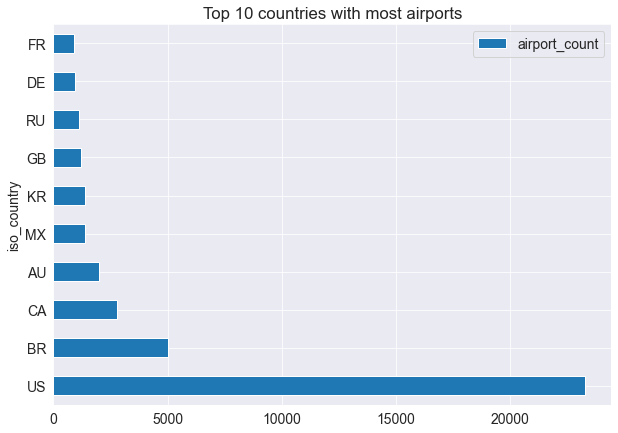

In [186]:
top_10.plot(
    x='iso_country', 
    y='airport_count',
    kind='barh',
    figsize=(10, 7),
    title='Top 10 countries with most airports')

to see some really nice charts!

<img src="airports_image.PNG">

In [125]:

airports.type.unique()
type_counts = airports.type.value_counts()
type_counts

small_airport     34807
heliport          12026
medium_airport     4537
closed             4376
seaplane_base      1030
large_airport       616
balloonport          24
Name: type, dtype: int64

Useful Links:

[pandas groupby](https://www.analyticsvidhya.com/blog/2020/03/groupby-pandas-aggregating-data-python/?utm_source=AVLinkedin&utm_medium=post&utm_campaign=2_September_advanced_Article)

C:\Users\Prakhar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


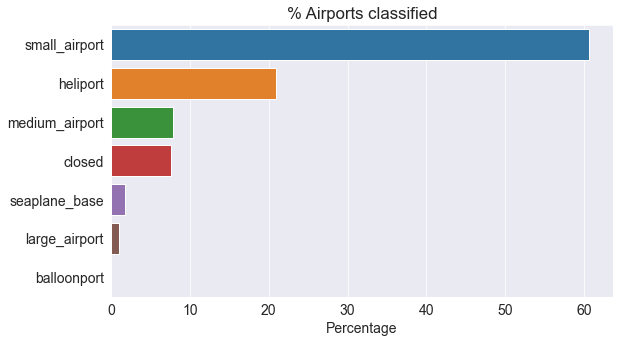

In [123]:
type_pct = airports.type.value_counts() * 100 / airports.type.count()

sns.barplot(type_pct, type_pct.index)

plt.title('% Airports classified')
plt.ylabel(None);
plt.xlabel('Percentage');